<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/3_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week #3 Histogram and Spatial Filtering


In [1]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1Z5tdeugKi8LyB2g-jJTwu3Y89Ljqj_SF -O area.jpg
!wget https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG -O camaraman.tif
!wget https://drive.google.com/uc?id=1J_SEj79YhWVcQrQKVEQkBDHroB-LxZgQ -O moon.png
!wget https://drive.google.com/uc?id=1eCyTF6u_w6bIDWrPONXJO5K0mo16DWwV -O sudoku.jpg

--2024-09-20 09:14:01--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 74.125.201.138, 74.125.201.139, 74.125.201.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-09-20 09:14:01--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.184.132, 2607:f8b0:4001:c66::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.184.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.001s  

2024-09-20 09:14:03 (56.3 MB/s) - ‘kitty.jpg’ saved

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Exercise #1 Histogram
* grayscale
* rgb
* equalization
* CLAHE

* Grayscale Histogram

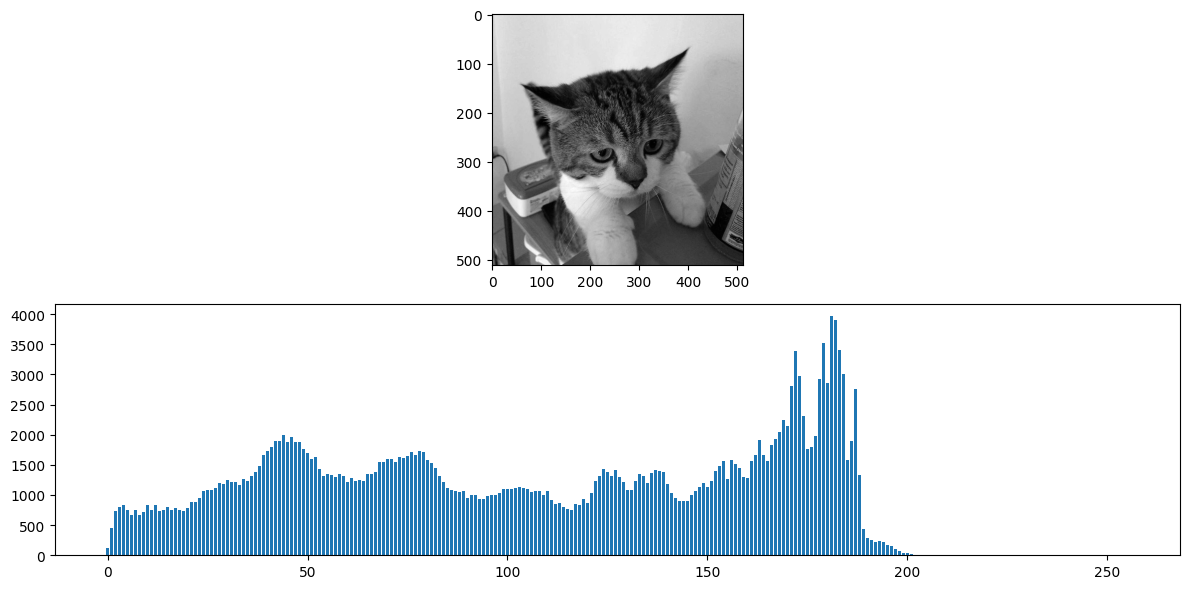

In [13]:
img = cv2.imread("kitty.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.imshow(img_gray,cmap='gray')
plt.subplot(2, 1, 2)
plt.bar(range(0,256),hist[:,0])
plt.tight_layout()
plt.show()

* RGB Histogram

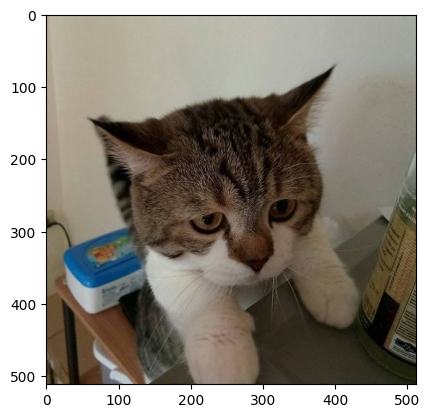

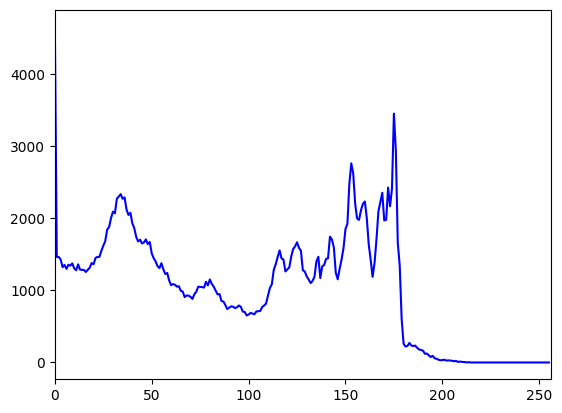

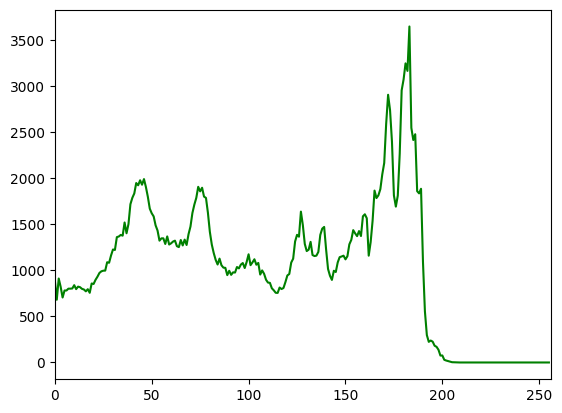

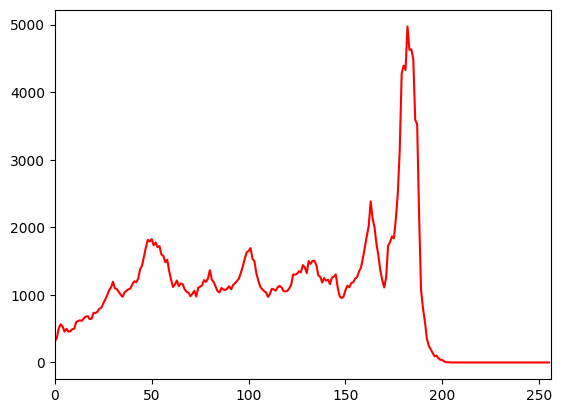

In [14]:
plt.imshow(img[:,:,::-1]);plt.show()
chans = cv2.split(img)
colors = ("b", "g", "r")
for (chan, color) in zip(chans, colors):
  # create a histogram for the current channel and plot it
  hist = cv2.calcHist( [chan], [0], None, [256], [0,256] )
  plt.plot(hist, color=color)
  plt.xlim([0, 256])
  plt.show()

* Histogram Equalization

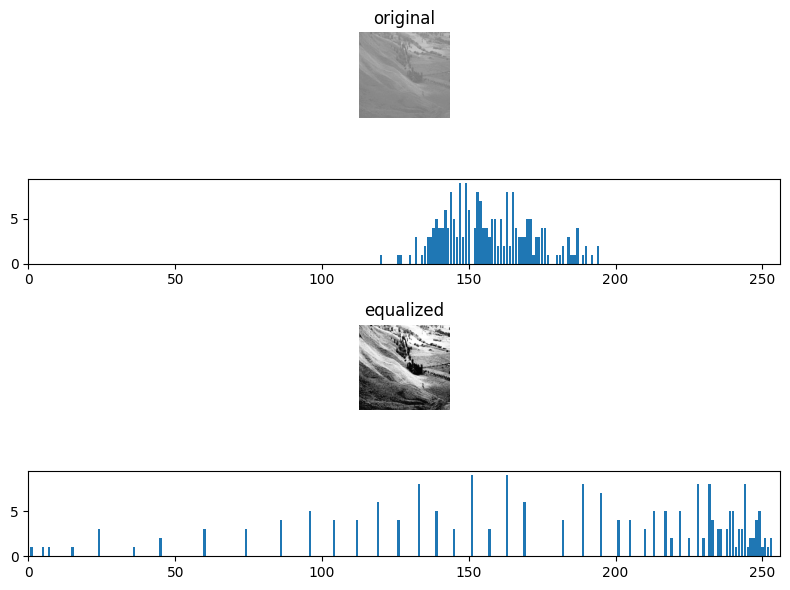

In [21]:
import cv2
img = cv2.imread("area.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# plot histogram of equalization + plot the histogram before and after equalized
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist(img_gray, [0], None, [256], [0, 256])
equ = cv2.equalizeHist(img_gray)
histeq = cv2.calcHist(equ, [0], None, [256], [0, 256])

plt.figure(figsize=(8, 6))
plt.subplot(4, 1, 1)
plt.imshow(img_gray,cmap='gray',vmin=0,vmax=255)
plt.axis('off')
plt.title("original")

plt.subplot(4, 1, 2)
plt.bar(range(0,256),hist[:,0])
plt.xlim([0, 256])

plt.subplot(4, 1, 3)
plt.imshow(equ,cmap='gray')
plt.axis('off')
plt.title("equalized")

plt.subplot(4, 1, 4)
plt.bar(range(0,256),histeq[:,0])
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

* CLAHE

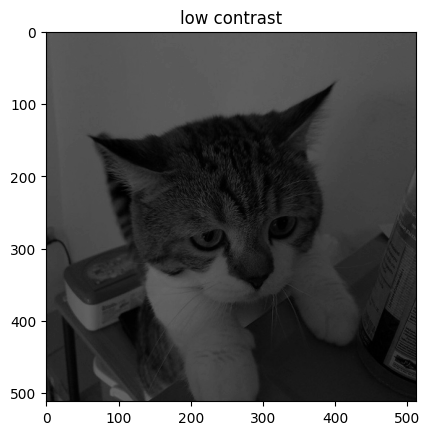

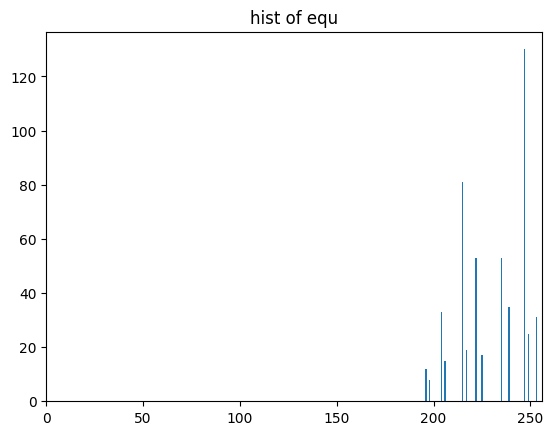

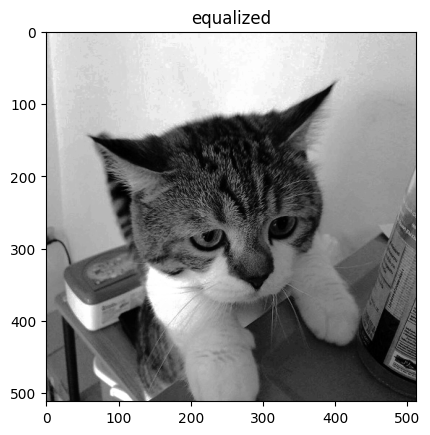

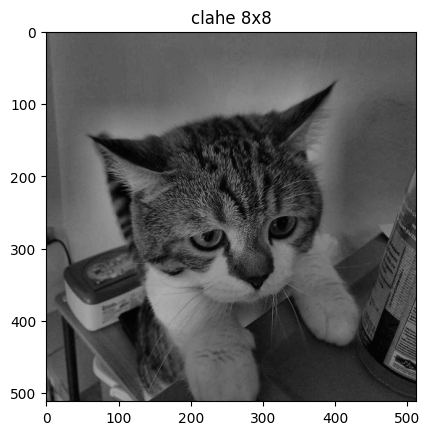

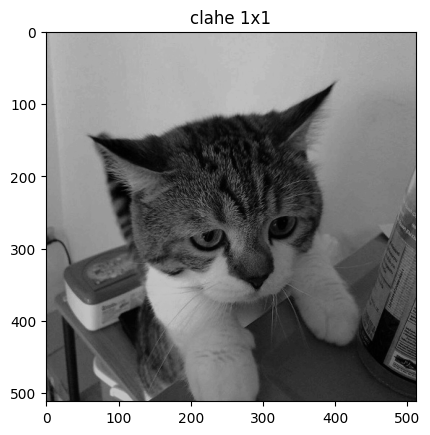

In [22]:
GAIN = 2

# Generate low contrast image
img = cv2.imread("kitty.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.divide(img,GAIN)

# Write your code to visualize the results
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.title("low contrast")
plt.show()

# Use Histogram Equalization
equ = cv2.equalizeHist(img)
histeq = cv2.calcHist(equ, [0], None, [256], [0, 256])
plt.bar(range(0,256),histeq[:,0])
plt.title('hist of equ')
plt.xlim([0, 256])
plt.show()

plt.imshow(equ,cmap='gray',vmin=0,vmax=255)
plt.title("equalized")
plt.show()



# Use CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray',vmin=0,vmax=255)
plt.title("clahe 8x8")
plt.show()


# TO DO : Use CLAHE - change cliplimit to 2.0 and grid size to 1x1
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(1,1))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray',vmin=0,vmax=255)
plt.title("clahe 1x1")
plt.show()


## Exercise #2 Spatial Filtering
*  Filter2D

In [23]:
small_im = np.random.random((5,5))*100
small_im = small_im.astype(np.uint8)

print(small_im)

kernel = np.ones((3,3),np.float32)/9
print(kernel)

dst_im = cv2.filter2D(small_im,-1,kernel)
print(dst_im)

[[49 33 28 84 29]
 [83 26 89 10 89]
 [ 0 57 30 97 22]
 [26 57 80 18 90]
 [58 50 36  4 55]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[43 56 44 57 46]
 [40 44 50 53 58]
 [43 50 52 58 50]
 [46 44 48 48 45]
 [49 52 44 52 35]]


* Averaging

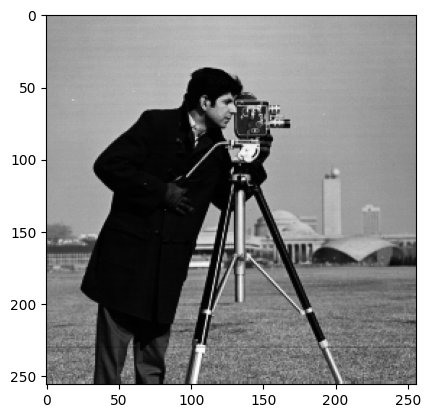

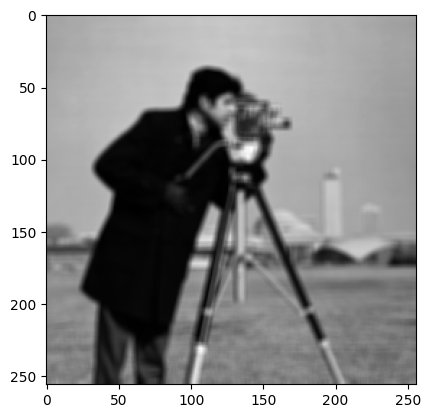

In [24]:
img = cv2.imread("camaraman.tif",0)

kernel = np.ones((5,5),np.float32)/(5*5)
dst_im = cv2.filter2D(img,-1,kernel)

plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(dst_im,cmap='gray')
plt.show()

* Laplacian Filtering

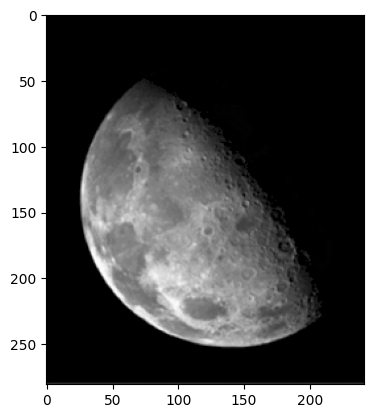

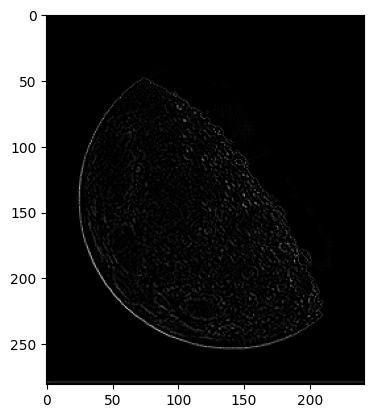

In [28]:
img_gray = cv2.imread("moon.png",0)

lap_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]],np.int16)
dst_im = cv2.filter2D(img_gray,-1,lap_filter)

plt.imshow(img_gray,cmap='gray')
plt.show()
plt.imshow(dst_im,cmap='gray')
plt.show()

## Exercise #3 Enhancing the image
* Enhancing the moon using laplacian filter

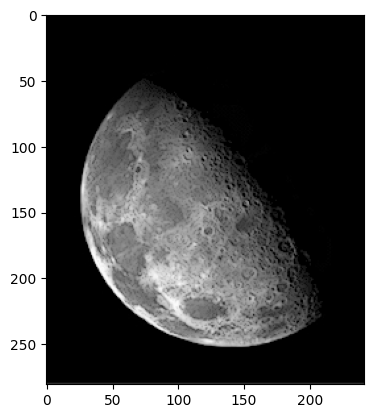

In [29]:
shap = cv2.subtract(img_gray,dst_im)
plt.imshow(shap,cmap='gray')
plt.show()

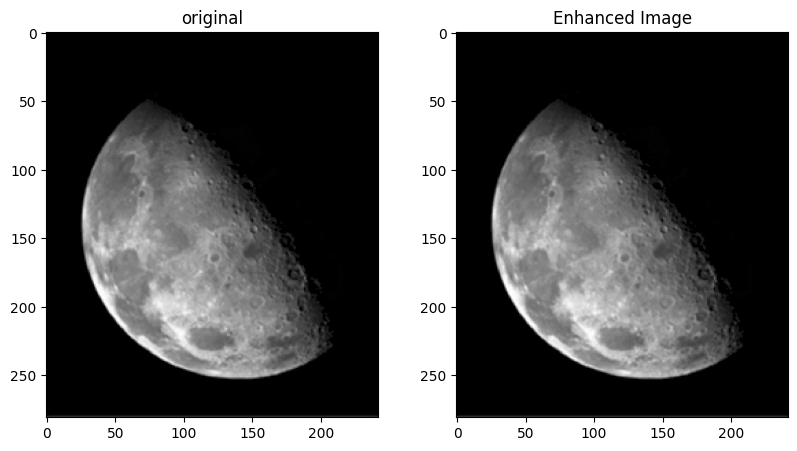

In [30]:
img_gray = cv2.imread("moon.png",0)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray,cmap='gray')
plt.title("original")


kernel = np.ones((3,3),np.float32)/1000
dst = cv2.filter2D(img_gray,-1,kernel)

enhanced_img = cv2.add(img_gray, dst)
plt.subplot(1, 3, 2)
plt.imshow(enhanced_img, cmap='gray')
plt.title("Enhanced Image")



plt.show()


